<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Introduction to Deep Learning </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[DSAIS]</a> MSc in Data Science & Artificial Intelligence Strategy <br/>
         Paris | © Saeed VARASTEH
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#ece4f5;">
    <img src="images/assignment.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#8966b0">
        <h4 style="padding-top:25px;"> FINAL PROJECT </h4>
    </span>
</div>

###  DSAIS Face Recognition Application


In this project, you'll build a facial recognition system to recognize all of your friends.

Face recognition problems generally fall into one of two categories:

- __Face verification__, where you build a model to distinguish your face from others. This is a binary classification problem.
- __Face Recognition__, where you build a model to identify multiple faces. This is a multi-class classification problem.

Imagine a system for the Emlyon building where we want to provide face recognition to allow students to enter the building.

The goal is to fine-tune the classification head of __FaceNet__ to classify all your friends.

The project consists of two phases. 

- __Face Detection:__ In the first phase, you will need to prepare your datasets; you will use the __MTCNN__ model to create cropped face images from your raw images and store them in new directories.

- __Face Recognition:__ The second phase is very similar to what we did with transfer learning. You modify the classifier head of __FaceNet__ and train it on the cropped face images.

You will find FaceNet documentation here: [FaceNet](https://github.com/timesler/facenet-pytorch)

Finally, you can use your trained model to test it on test data.

__Extra step (high bounce!)__:

Build a Python application that shows recognized faces of DSAIS students on video feeds (or real-time images from the camera). 

---

### Getting face samples

For this project, you will need eleven photos of yourself and each of your friends on which to base your facial recognition application. 

You will have to work together to get them. 

__The sooner you take your photos and share them with others, the easier it will be for everyone to start working on the project.__

Let us say the deadline for uploading your pictures is <span style="color:crimson">Sunday, February 25, 23:59.</span>

Once you have your photos, post them [here](https://drive.google.com/drive/folders/1O8InPDGGy1eK7qjT92rL0DU9nd16lbo8?usp=sharing) under your name:

#### Names

#### OpenCV Library

Install the opencv library if you do not have it. It is needed to access the camera on your machine.

In [ ]:
#!pip install opencv-python

#### Get Samples

----

### Phase 01: Face detection

In [ ]:
#!pip install facenet_pytorch

In [3]:
#!pip install mtcnn
import os
from PIL import Image
from facenet_pytorch import MTCNN
import torch
from torchvision.transforms.functional import to_pil_image

import os
#import cv2
import numpy as np
from tqdm import tqdm
from facenet_pytorch import InceptionResnetV1, MTCNN
from PIL import Image 
import math 
from torchvision.transforms.functional import to_pil_image

In [29]:
import os
from PIL import Image
from facenet_pytorch import MTCNN
import torch
from torchvision.transforms.functional import to_pil_image

import os
#import cv2
import numpy as np
from tqdm import tqdm
from facenet_pytorch import InceptionResnetV1, MTCNN
from PIL import Image 
import math 
from torchvision.transforms.functional import to_pil_image

#data_dir = './samples/train'
#output_dir = './samples/train_cropped'

def process_dataset(data_dir, output_dir):

    os.makedirs(output_dir, exist_ok=True)

    mtcnn = MTCNN(keep_all=True, device='cuda' if torch.cuda.is_available() else 'cpu')

    for person_name in os.listdir(data_dir):
        person_dir = os.path.join(data_dir, person_name)
        if os.path.isdir(person_dir):
            output_person_dir = os.path.join(output_dir, person_name)
            os.makedirs(output_person_dir, exist_ok=True)

            for image_name in os.listdir(person_dir):
                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(person_dir, image_name)
                    image = Image.open(image_path).convert('RGB')  # Convert to RGB
                    results = mtcnn.detect(image)

                    if results is not None:
                        delimit, logit = results
                        
                        if delimit is not None and logit is not None:
                            best_logit = max(logit)
                            indices = [i for i, x in enumerate(logit) if x == best_logit]
                            best_face = [delimit[index] for index in indices]                            
                            if best_face is not None:
                                    #x, y, w, h = (best_face[0], best_face[1], best_face[2], best_face[3])
                                    x, y, w, h = (best_face[0][0], best_face[0][1], best_face[0][2], best_face[0][3])
                                    cropped_face = image.crop((x, y,w, h))
                                    face_path = os.path.join(output_person_dir, f"face_{image_name}")

                                # Save the cropped face image
                                    cropped_face.save(face_path)
                        else: ('face not found:{image_path}')
    print("Face detection and cropping completed.")

In [1]:
dataset_folder = r'D:\Documents\Documents\EM Lyon\001B_Semester_2\08-Deep Learning\Deep Learning Course\Homeworks\data\Final_project\curated_data\train'
output_folder = r'D:\Documents\Documents\EM Lyon\001B_Semester_2\08-Deep Learning\Deep Learning Course\Homeworks\data\Final_project\mtcnn_processed_images'
os.makedirs(output_folder, exist_ok=True)
process_dataset(dataset_folder, output_folder)

NameError: name 'os' is not defined

In [4]:
dataset_folder = r'D:\Documents\Documents\EM Lyon\001B_Semester_2\08-Deep Learning\Deep Learning Course\Homeworks\data\Final_project\curated_data\val'
output_folder = r'D:\Documents\Documents\EM Lyon\001B_Semester_2\08-Deep Learning\Deep Learning Course\Homeworks\data\Final_project\mtcnn_test'
os.makedirs(output_folder, exist_ok=True)
process_dataset(dataset_folder, output_folder)

NameError: name 'process_dataset' is not defined

### Phase 02: Face recognition 

Downloading the packages needed 

In [ ]:
#!pip install facenet-pytorch


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split


from facenet_pytorch import MTCNN,  InceptionResnetV1, fixed_image_standardization, training
from torch.optim.lr_scheduler import MultiStepLR
from torchvision import models
np.random.seed(72)
torch.manual_seed(72)

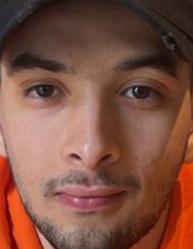

In [9]:
from PIL import Image 
from IPython import display

img = Image.open(r"D:\Documents\Documents\EM Lyon\001B_Semester_2\08-Deep Learning\Deep Learning Course\Homeworks\data\Final_project\mtcnn_processed_images\Ahmed\face_Picture 1.jpg")

display.display(img)


In [10]:
from torchvision import transforms
train_transform = transforms.Compose([
   transforms.Resize((160,160)),
   transforms.RandomAffine(degrees=15, translate=[0.1, 0.1]), # Optional: Small translation to simulate off-center subjects
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(),
    transforms.RandomGrayscale(p=0.1),
    transforms.RandomVerticalFlip(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [11]:
val_transform = transforms.Compose([
   transforms.Resize((160,160)),
   transforms.RandomAffine(degrees=15, translate=[0.1, 0.1]), # Optional: Small translation to simulate off-center subjects
    transforms.RandomHorizontalFlip(),
        transforms.RandomGrayscale(p=0.1),
    transforms.RandomVerticalFlip(p=0.1),
    transforms.ColorJitter(),
   transforms.ToTensor(),
   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

])

In [12]:
from torchvision import datasets 
train_dataset = datasets.ImageFolder(root=r'D:\Documents\Documents\EM Lyon\001B_Semester_2\08-Deep Learning\Deep Learning Course\Homeworks\data\Final_project\mtcnn_processed_images', transform=train_transform)
val_dataset = datasets.ImageFolder(root=r'D:\Documents\Documents\EM Lyon\001B_Semester_2\08-Deep Learning\Deep Learning Course\Homeworks\data\Final_project\mtcnn_test', transform=val_transform)


In [13]:
# Extract class names from the dataset
class_names = train_dataset.classes


# Create a dictionary to map class indices to class labels
class_idx_to_label = {i: class_name for i, class_name in enumerate(class_names)}

In [14]:
class_names_test = val_dataset.classes

In [15]:
len(train_dataset) ,len(val_dataset),

(430, 46)

In [16]:
train_dataset, test_dataset = random_split(train_dataset,[407, 23])
len(train_dataset), len(test_dataset)

(407, 23)

In [17]:
train_loader = DataLoader(dataset=train_dataset, batch_size=8)
test_loader = DataLoader(dataset=test_dataset, batch_size=8)

In [18]:
device='cpu'

Face Net 

In [19]:
#help(InceptionResnetV1)

In [20]:
class FaceNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        facenet_model = InceptionResnetV1(pretrained='vggface2').eval().to(device)
        base_facenet = list(facenet_model.children())[:-5]
        self.features = nn.Sequential(*base_facenet)
        
        self.avgpool_1a = facenet_model.avgpool_1a
        self.dropout = facenet_model.dropout
        self.last_linear = facenet_model.last_linear
        self.last_bn = facenet_model.last_bn
        

        self.lightweight_network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 120),
            #nn.ReLU(),
            nn.SiLU(),
            #nn.Dropout(0.3),
            nn.Linear(120, 46),

        )

    def forward(self, x):
        out = self.features(x)
        out = self.avgpool_1a(out)
        out = self.dropout(out)
        out = torch.flatten(out, 1)
        out = self.last_linear(out)
        out = self.last_bn(out)
        out = self.lightweight_network(out)
        
        
        return out

In [21]:
tmpModel = FaceNetModel().to(device)
tmpImg, _= next(iter(train_loader))
tmpImg = tmpImg.to(device)
tmpOut = tmpModel(tmpImg)
tmpOut.shape

torch.Size([8, 46])

In [22]:
model = FaceNetModel().to(device)

for params in model.features.parameters():
    params.requires_grad = False

print("Done")

Done


In [23]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [29]:
torch.cuda.empty_cache() 
#import torch.optim.adabound as AdaBound
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import confusion_matrix
import seaborn as sns

#conf_matrix_val = torch.zeros(len(class_names), len(class_names))

train_losses = []; train_accs = []
validation_losses = []; validation_accs = []

lr = 0.001
n_epochs = 5

loss_fn = nn.CrossEntropyLoss()
#optimizer = AdaBound(model.parameters(), lr=lr, weight_decay=5e-4)
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
#scheduler = StepLR(optimizer, step_size=2, gamma=0.5)

for epoch in range(n_epochs):
    # Training Loop
    model.train()
    train_loss, train_acc = 0, 0
    
    for x_batch, y_batch in train_loader:  
            
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_logits = model(x_batch)
        loss = loss_fn(y_logits, y_batch)
        
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()    
        optimizer.step()
        
        #scheduler.step()
        
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # turn logits -> pred probs -> pred labels
        train_acc += accuracy_fn(y_true=y_batch, y_pred=y_pred) 
        
        #conf_matrix_tr += confusion_matrix(y_batch.cpu().numpy(), y_pred.cpu().numpy())
        
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    train_acc /= len(train_loader)
    train_accs.append(train_acc)
    
    # Validation Loop
    model.eval()
    validation_loss , validation_acc = 0, 0
    
    with torch.no_grad():
        for x_val, y_val in test_loader:

            x_val = x_val.to(device)
            y_val = y_val.to(device)

            y_logits = model(x_val)
            val_loss = loss_fn(y_logits, y_val)
            
            validation_loss += val_loss.item()
            
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
            validation_acc += accuracy_fn(y_true=y_val, y_pred=y_pred) 
            
        #conf_matrix_val += confusion_matrix(y_val.cpu().numpy(), y_pred.cpu().numpy(),labels=range(46))
            
    validation_loss /= len(test_loader)
    validation_losses.append(validation_loss)
    
    validation_acc /= len(test_loader)
    validation_accs.append(validation_acc)
    
    
    # Print out what's happening every 10 epochs
    if epoch % 1 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f}% | val loss: {validation_loss:.5f}, val acc: {validation_acc:.2f}%")
    
      
# Plot confusion matrices
#fig, axes = plt.subplots(1, 1, figsize=(16, 8))
#sns.heatmap(conf_matrix_val, annot=True, fmt='g', ax=axes[1], cmap="crest")
#axes.set_title("Validation Confusion Matrix")
#plt.show()

Epoch: 0 | Loss: 0.60605, Accuracy: 86.03% | val loss: 1.01992, val acc: 82.14%
Epoch: 1 | Loss: 0.39299, Accuracy: 92.58% | val loss: 0.51057, val acc: 91.67%
Epoch: 2 | Loss: 0.39695, Accuracy: 90.20% | val loss: 0.47708, val acc: 86.31%
Epoch: 3 | Loss: 0.43181, Accuracy: 90.44% | val loss: 0.37163, val acc: 86.90%
Epoch: 4 | Loss: 0.46143, Accuracy: 87.99% | val loss: 0.41032, val acc: 91.67%


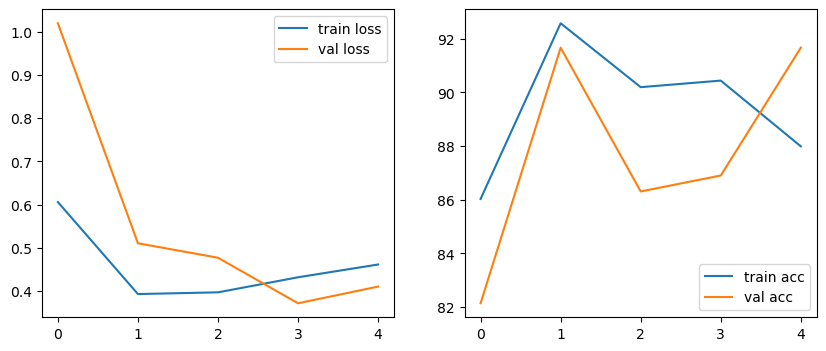

In [30]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(train_losses,  label="train loss"); 
ax[0].plot(validation_losses,  label="val loss"); 
ax[0].legend();

ax[1].plot(train_accs,  label="train acc");
ax[1].plot(validation_accs,  label="val acc"); 
ax[1].legend();

Checking the model

In [25]:
transform = transforms.Compose([
   transforms.Resize((299,299)),
   transforms.RandomAffine(degrees=15, translate=[0.1, 0.1]), # Optional: Small translation to simulate off-center subjects
    transforms.RandomHorizontalFlip(),
        transforms.RandomGrayscale(p=0.1),
    transforms.RandomVerticalFlip(p=0.1),
    transforms.ColorJitter(),
   transforms.ToTensor(),
   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

]) 

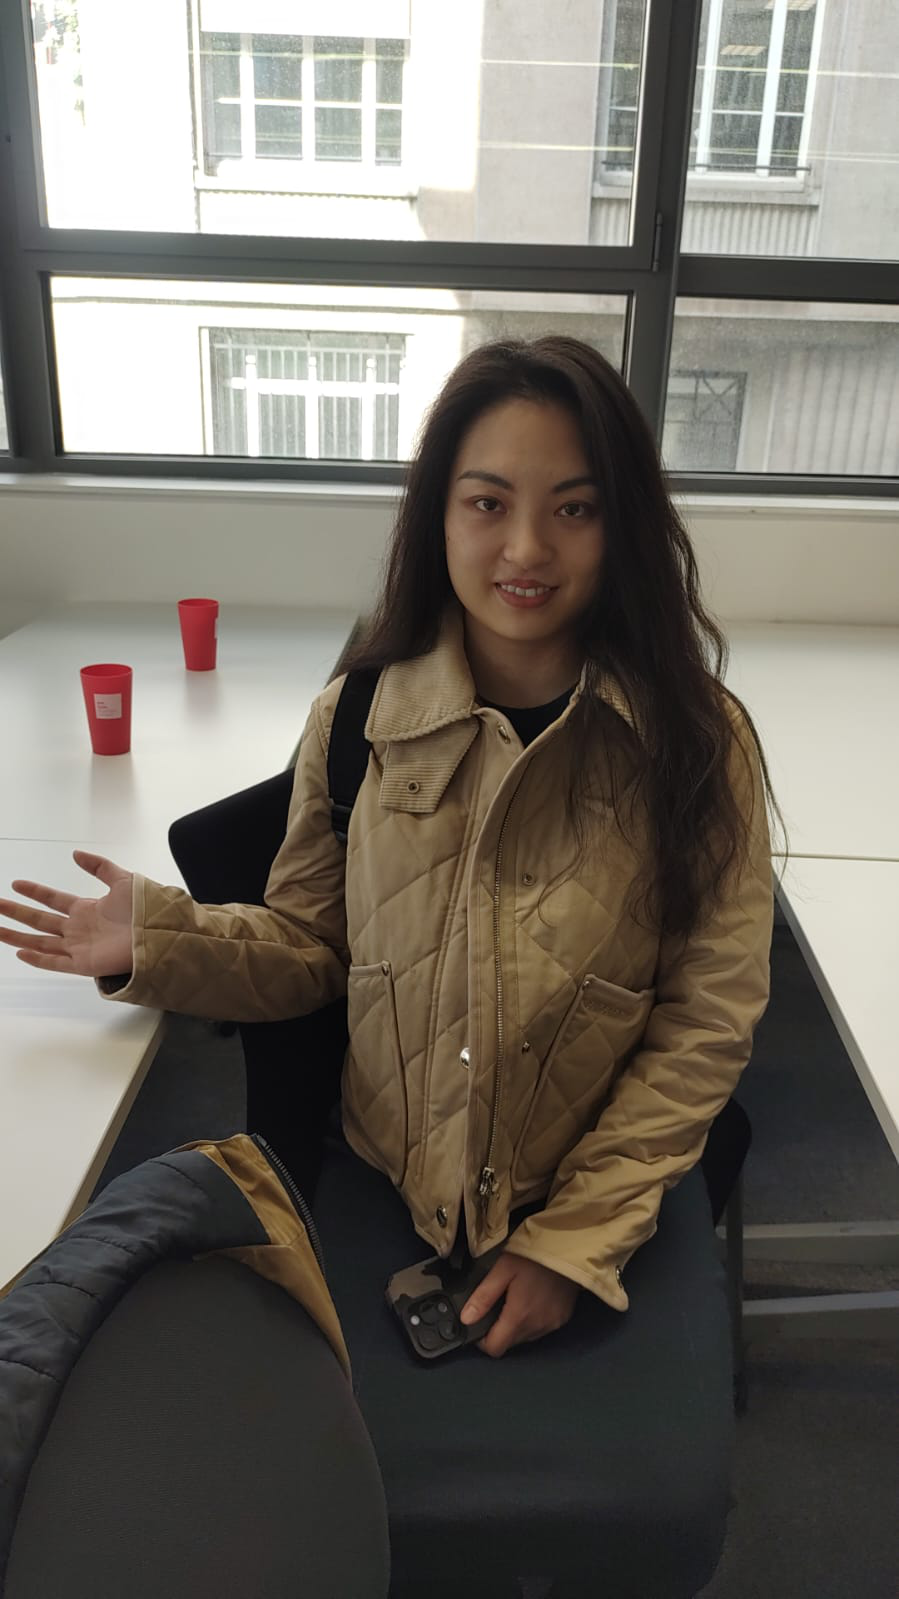

['Romain']

In [26]:
from PIL import Image

image_path = r"C:\Users\jeanl\Downloads\WhatsApp Image 2024-03-08 at 11.54.17.jpeg"
image = Image.open(image_path)
display.display(image)
transformed_image = transform(image)
image_tensor = transformed_image.to(device)
image_tensor = image_tensor.unsqueeze(0)
model.eval()
y_logits = model(image_tensor)
y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred_labels = [class_idx_to_label[idx.item()] for idx in y_pred]
y_pred_labels

In [27]:
def predict_frame(frame, model, transform, device):

    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    mtcnn = MTCNN(keep_all=True, device='cuda' if torch.cuda.is_available() else 'cpu')

    boxes, _ = mtcnn.detect(pil_image)

    if boxes is None:
        return None, None

    predictions = []

    for box in boxes:

        face = pil_image.crop((box[0], box[1], box[2], box[3]))

        face = transform(face).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(face)
            _, predicted = torch.max(outputs.data, 1)
            predictions.append(predicted.item())

    return boxes, predictions

In [28]:
# Initialize webcam
import cv2
import torch
from PIL import Image
from facenet_pytorch import MTCNN

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    boxes, predictions = predict_frame(frame, model, transform, device)

    if boxes is not None:
        for box, predicted_class_idx in zip(boxes, predictions):

            predicted_class_name =   class_idx_to_label[predicted_class_idx]

            cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
            cv2.putText(frame, predicted_class_name, (int(box[0]), int(box[1]-10)), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)

    cv2.imshow('Video Feed', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()

cv2.destroyAllWindows() 
mtcnn = MTCNN(keep_all=True, device="cpu")



Resnet-50 Neural Network

In [ ]:
class ResNet50Model(nn.Module):
    def __init__(self):
        super().__init__()
        resnet_model = models.resnet50(weights="DEFAULT")
        base_ = list(resnet_model.children())[:-1]
        self.features = nn.Sequential(*base_)
        
        self.fc = nn.Sequential(
                nn.Flatten(), # 512x7x7 --> 25088x1
                nn.Linear(2048,500),
                nn.Linear(500,46)
        )
    
    def forward(self, x):
        out = self.features(x)
        out = self.fc(out)
        
        return out
    
tmpModel = ResNet50Model().to(device)
tmpImg, _= next(iter(train_loader))
tmpImg = tmpImg.to(device)
tmpOut = tmpModel(tmpImg)
tmpOut.shape

In [ ]:
model = ResNet50Model().to(device)

for params in model.features.parameters():
    params.requires_grad = False

print("Done")

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [ ]:
train_losses = []; train_accs = []
validation_losses = []; validation_accs = []

lr = 0.01
n_epochs = 1

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # Training Loop
    model.train()
    train_loss, train_acc = 0, 0
    
    for x_batch, y_batch in train_loader: 
            
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_logits = model(x_batch) # squeeze to remove extra `1` dimensions,
        loss = loss_fn(y_logits, y_batch)
        
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()    
        optimizer.step()
        
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # turn logits -> pred probs -> pred labels
        train_acc += accuracy_fn(y_true=y_batch, y_pred=y_pred) 
        
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    train_acc /= len(train_loader)
    train_accs.append(train_acc)
    
    # Validation Loop
    model.eval()
    validation_loss , validation_acc = 0, 0
    
    with torch.no_grad():
        for x_val, y_val in train_loader:

            x_val = x_val.to(device)
            y_val = y_val.to(device)

            y_logits = model(x_val)
            val_loss = loss_fn(y_logits, y_val)
            
            validation_loss += val_loss.item()
            
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
            validation_acc += accuracy_fn(y_true=y_val, y_pred=y_pred) 
        
    validation_loss /= len(train_loader)
    validation_losses.append(validation_loss)
    
    validation_acc /= len(train_loader)
    validation_accs.append(validation_acc)
    
    # Print out what's happening every 10 epochs
    if epoch % 1 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f}% | val loss: {validation_loss:.5f}, val acc: {validation_acc:.2f}%")


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(train_losses,  label="train loss"); 
ax[0].plot(validation_losses,  label="val loss"); 
ax[0].legend();

ax[1].plot(train_accs,  label="train acc");
ax[1].plot(validation_accs,  label="val acc"); 
ax[1].legend();

---

# NOTEBOOK OF THE RESULTS

+ Images Transormed
+ Model Resnet50
+ UnFrozen weights
+ lr =0.01
+ optimizer Adam


Epoch: 0 | Loss: 12.39142, Accuracy: 14.10% | val loss: 6.99946, val acc: 21.03%

+ Images just reshaped
+ Model Resnet50
+ Frozen weights
+ lr =0.01
+ optimizer Adam


Epoch: 0 | Loss: 4.77239, Accuracy: 2.56% | val loss: 314130.94712, val acc: 0.77%

+ Images just reshaped
+ Model Resnet50
+ UnFrozen weights
+ lr =0.01
+ optimizer Adam


Epoch: 0 | Loss: 5.50094, Accuracy: 13.59% | val loss: 5.22778, val acc: 23.85%

+ Images just reshaped
+ Model Resnet50
+ UnFrozen weights
+ lr =0.001
+ optimizer Adam


Epoch: 0 | Loss: 3.81925, Accuracy: 4.87% | val loss: 3.48758, val acc: 16.67%

+ Images just reshaped
+ Model ResnetV1
+ Frozen weights
+ lr =0.01
+ optimizer SGD


Epoch: 0 | Loss: 1.59268, Accuracy: 71.15% | val loss: 2.40955, val acc: 38.89%

+ Images just reshaped
+ Model ResnetV1
+ UnFrozen weights
+ lr =0.01
+ optimizer SGD


Epoch: 0 | Loss: 3.80450, Accuracy: 5.05% | val loss: 3.75325, val acc: 7.12%

+ Images just reshaped
+ Model ResnetV1
+ UnFrozen weights
+ lr =0.01
+ optimizer Adam


Epoch: 0 | Loss: 5.94543, Accuracy: 31.25% | val loss: 6.56866, val acc: 24.48%

+ Model ResnetV1
+ UnFrozen weights
+ lr =0.005
+ Penultima Linea 146
+ optimizer AdamW

Epoch: 0 | Loss: 4.03570, Accuracy: 12.16% | val loss: 3.50707, val acc: 18.75%
Epoch: 1 | Loss: 2.93324, Accuracy: 27.70% | val loss: 2.61983, val acc: 36.11%
Epoch: 2 | Loss: 2.40145, Accuracy: 34.12% | val loss: 2.72687, val acc: 40.28%

+ 300 neural nets

Epoch: 0 | Loss: 4.74045, Accuracy: 9.80% | val loss: 3.91102, val acc: 22.92%
Epoch: 1 | Loss: 3.34896, Accuracy: 27.70% | val loss: 2.57608, val acc: 45.83%
Epoch: 2 | Loss: 2.47652, Accuracy: 38.85% | val loss: 2.10100, val acc: 52.78%
